In [ ]:
'''
【项目05】  多场景下的算法构建

课程数据：
某公司A,B产品在2018年1,2,3月的销量数据，数据格式为xlsx

作业要求：
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)，函数中通过input来输入excel数据所在文件夹路径，再通过遍历来读取文件
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]

2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法

3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
% matplotlib inline

In [2]:
'''
1、批量读取数据，并输出以下信息
（1）数据量
（2）数据字段columns
（3）输出每个文件分别有多少缺失值
要求：
① 创建独立函数，从读取数据到以上输出要求
② 运行代码多次调用创建函数，对数据进行批量处理
提示：
① 将课程excel数据放入单独文件夹(建议英文路径)
② pd.read_excel()中用“index_col”参数，将第一列变为index
③ os.walk(path) → 返回路径中的信息及文件，结果为一个生成器
④ 定位缺失值位置：data[data.isnull().values == True]

'''

def f1_1():
    path = 'C:/Users/Hjx/Desktop/项目05多场景下的算法构建/'
    folder = os.walk(path)   # 遍历文件夹
    files = list(folder)[0][2]
    n = 1
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col = 0)
        data_counts = len(data)   # 计算数据量
        columns = data.columns.tolist()  # 输出数据columns
        nan_counts = len(data[data.isnull().values == True])   # 计算缺失值数量
        print('第%i个数据数据量为：%i' % (n, data_counts))
        print('第%i个数据数据字段为：' % n,columns)
        print('第%i个数据缺失值数量为：%i' % (n, nan_counts))
        print('------')
        n += 1
        
f1_1() # 运行函数
print('finished!')

第1个数据数据量为：31
第1个数据数据字段为： ['productA', 'productB']
第1个数据缺失值数量为：3
------
第2个数据数据量为：28
第2个数据数据字段为： ['productA', 'productB']
第2个数据缺失值数量为：4
------
第3个数据数据量为：31
第3个数据数据字段为： ['productA', 'productB']
第3个数据缺失值数量为：3
------
finished!


运行函数f2_1(), 分别得到 data1，data2，data3
-------
运行函数f2_2(), 求出不同月份A,B产品总销量，并制作图表
-------
A产品月度超过80%的销量日期分别为
 ['2018-01-26 00:00:00', '2018-02-23 00:00:00', '2018-03-25 00:00:00']
运行函数f2_3(), 求出A产品每个月中超过了月度80%的销量的日期
-------


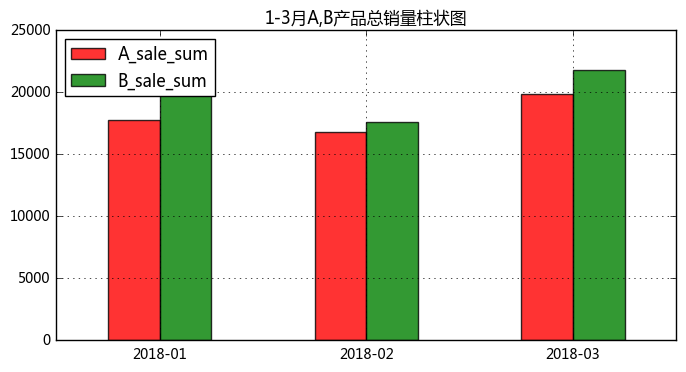

In [3]:
'''
2、批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作
（1）读取数据并用均值填充缺失值；对“日期”字段进行时间序列处理，转换成日period ，最后输出三个Dataframe文件data1,data2,data3
（2）分别计算data1，data2，data3中A,B产品的月总销量，并绘制多系列柱状图，存储在对应的图片文件夹路径
（3）分别计算A产品在每个月中哪一天超过了月度80%的销量，输出日期
要求：
① 分别创建四个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 时间序列转换方法提示：pd.to_period
② 时间戳Timestampe转化成字符串用str()方法

'''

# 创建函数f2_1() → 完成问题2-1
def f2_1():
    path = 'C:/Users/Hjx/Desktop/项目05多场景下的算法构建/'
    folder = os.walk(path)   # 遍历文件夹
    files = list(folder)[0][2]
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col = 0)
        columns = data.columns.tolist()  # 提取列名
        data.to_period()  # 转换成时间序列
        data[columns[0]].fillna(data[columns[0]].mean(),inplace = True)  
        data[columns[1]].fillna(data[columns[1]].mean(),inplace = True)
        # 均值填充缺失值
        data_files.append(data)
    return(data_files)


# 创建函数f2_2() → 完成问题2-2   
def f2_2(*data_files):
    path = 'C:/Users/Hjx/Desktop/项目05图片保存位置/'
    A_sale = []
    B_sale = []
    for data in data_files:
        columns = data.columns  # 提取列名
        A_sale.append(data[columns[0]].sum())   # 更新A产品总销售量
        B_sale.append(data[columns[1]].sum())   # 更新B产品总销售量
    df = pd.DataFrame({'A_sale_sum': A_sale,'B_sale_sum':B_sale},
                     index = pd.period_range('201801','201803',freq = 'M'))
    #print(df)   
    # 查看数据
    plt.figure()
    df.plot(kind = 'bar',style = '--o',color = ['r','g'],alpha = 0.8, rot = 0,figsize = (8,4))
    plt.title('1-3月A,B产品总销量柱状图')
    plt.ylim([0,25000])
    plt.legend(loc = 'upper left')
    plt.grid()
    plt.savefig(path + '1-3月A,B产品总销量柱状图.png',dpi=400)
    # 绘制图表，并导出图表

    
# 创建函数f2_3() → 完成问题2-3       
def f2_3(*data_files):
    keydates = []
    for data in data_files:
        columns = data.columns  # 提取列名
        data['A_sale_sum%'] = data[columns[0]].cumsum() / data[columns[0]].sum()  # 计算A产品累计销量占比
        keydate = data[data['A_sale_sum%']>0.8].index[0]  
        keydates.append(str(keydate))
        # 记录销量超过80%的日期
    print('A产品月度超过80%的销量日期分别为\n', keydates)
    return(keydates)


f2_1()
data1, data2, data3 = f2_1()[0], f2_1()[1], f2_1()[2]
#print(data1.head(),'\n-----')
#print(data1.head(),'\n-----')
#print(data1.head(),'\n-----')
print('运行函数f2_1(), 分别得到 data1，data2，data3\n-------')

f2_2(data1,data2,data3)
print('运行函数f2_2(), 求出不同月份A,B产品总销量，并制作图表\n-------')

f2_3(data1,data2,data3)
print('运行函数f2_3(), 求出A产品每个月中超过了月度80%的销量的日期\n-------')

运行函数f3_1(), 查看AB产品销量关系，并制作图表
-------
预测当A销量为1200时，B产品销量值为1303.8
运行函数f3_2(), 对AB产品销量数据做回归分析并制图，并预测当A销量为1200时，B产品销量值
-------


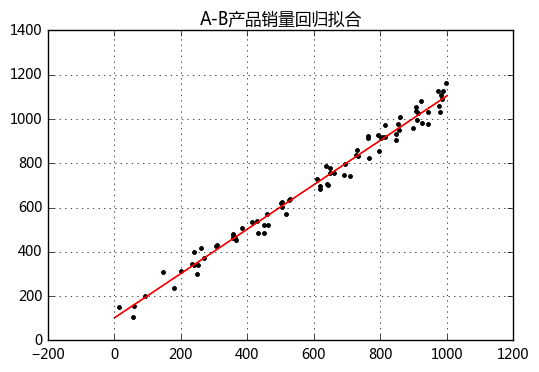

In [4]:
'''
3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值
（1）读取数据删除缺失值；对“日期”字段进行时间序列处理，转换成日period ，合并三个月数据，输出data；
（2）针对A产品销量和B产品销量数据做回归分析，制作散点图并存储，并预测当A销量为1200时，B产品销量值
要求：
① 分别创建两个函数，对应完成上述需求
② 数据文件夹路径和图片存储路径不要相同
提示：
① 用pd.dripna方法去掉缺失值，注意inplace参数

'''

# 创建函数f3_1() → 完成问题3-1
def f3_1():
    path = 'C:/Users/Hjx/Desktop/项目05多场景下的算法构建/'
    folder = os.walk(path)   # 遍历文件夹
    files = list(folder)[0][2]
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col = 0)
        columns = data.columns.tolist()  # 提取列名
        data.to_period()  # 转换成时间序列
        data.dropna(inplace=True)  # 删除缺失值
        data_files.append(data)
    data = pd.concat([data_files[0],data_files[1],data_files[2]])  # 合并数据
    return(data)


# 创建函数f3_2() → 完成问题3-2
def f3_2(data):
    path = 'C:/Users/Hjx/Desktop/项目05图片保存位置/'
    model = LinearRegression()
    model.fit(data['productA'][:,np.newaxis],data['productB'])  
    # 构建回归模型
    xtest = np.linspace(0,1000,1000)
    ytest = model.predict(xtest[:,np.newaxis])
    plt.scatter(data['productA'],data['productB'],marker = '.',color = 'k')
    plt.plot(xtest,ytest,color = 'r')
    plt.grid(True)
    plt.title('A-B产品销量回归拟合')
    plt.savefig(path + 'A-B产品销量回归拟合.png',dpi=400)  
    # 存储图表
    return(model.predict(1200))

f3_1()
data = f3_1()
print('运行函数f3_1(), 查看AB产品销量关系，并制作图表\n-------')

f3_2(data)
print('预测当A销量为1200时，B产品销量值为%.1f' % f3_2(data))
print('运行函数f3_2(), 对AB产品销量数据做回归分析并制图，并预测当A销量为1200时，B产品销量值\n-------')